# Visualize GO analysis

In [1]:
import numpy as np
import pandas as pd

In [2]:
def get_top_GO(tissue, fn, label):
    df = pd.read_excel(fn).sort_values('p_uncorrected').head(15)
    df['Log10'] = -np.log10(df['p_fdr_bh'])
    df['Tissue'] = tissue
    df['Bias'] = label
    return df

In [18]:
tissue = 'caudate'
config = {
    'All': 'GO_analysis_all_TWAS.xlsx',
    'Increased Risk': 'GO_analysis_downregulated.xlsx',
    'Protective': 'GO_analysis_upregulated.xlsx',
}

df = pd.DataFrame()
for bias in ['Increased Risk', 'Protective']:
    df = pd.concat([df, get_top_GO(tissue, config[bias], bias)], axis=0)

fac = []
for ii in range(df.shape[0]):
    xx, yy = df[['ratio_in_study']].iloc[ii, 0].split('/')
    fac.append((int(xx) / int(yy)) * 2)
    
df['geneRatio'] = fac
print(np.min(fac), np.max(fac))

0.02909090909090909 1.3163636363636364


In [ ]:
df.to_csv("%s_GO_analysis.tsv" % tissue, sep='\t', index=False)

## Plot 

In [4]:
%load_ext rpy2.ipython

In [19]:
%%R -i df
library(ggplot2)
library(tidyverse)

save_plot <- function(p, fn, w, h){
    for(ext in c('.svg', '.png', '.pdf')){
        ggsave(file=paste0(fn,ext), plot=p, width=w, height=h)
    }
}

plot_GO <- function(){
    cbPalette <- c("Blue", "Red")
    gg1 = df %>%
        ggplot(aes(x=Log10, y=name, color=Bias, size=geneRatio)) + 
        geom_point(shape=18, alpha=0.8) + labs(y='', x='-Log10 (FDR)') + 
        scale_colour_manual(name="TWAS Enrichment", values=cbPalette, 
                            labels=c("Downregulated in SZ", "Upregulated in SZ")) +
        geom_vline(xintercept = -log10(0.05), linetype = "dotted") +
        ggpubr::theme_pubr(base_size=15) +
        theme(axis.title=element_text(face='bold'), 
              strip.text=element_text(face='bold'), 
              legend.position="right")
    return(gg1)
}

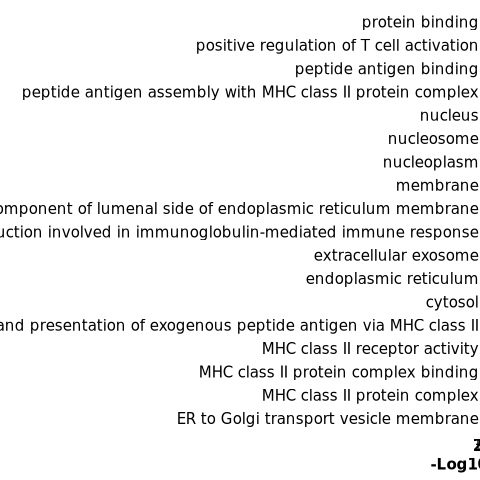

In [20]:
%%R
gg1 = plot_GO()
print(gg1)
save_plot(gg1, "GO_top15_stacked", 15, 8)